#### What
Neural Networks from scratch using MNIST.
Hardcoded, no libraries.

Merry christmas.


#### References:
1. [Scikitlearn ](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html)

In [49]:
import numpy as np
import time
import matplotlib.pyplot as plt

from numba import cuda
from sklearn.datasets import fetch_openml

MAX_VALUE = 255.0
IMG_SIZE  = 784

In [42]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')

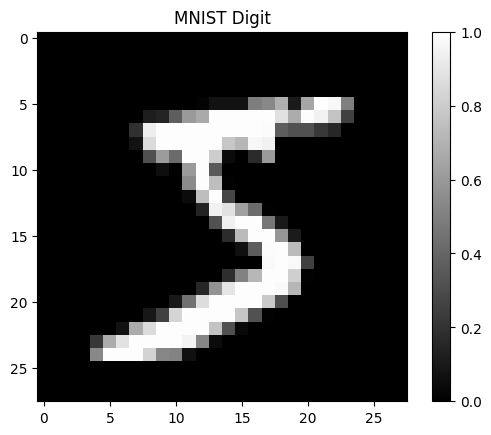

Elapsed time: 22.78480078125


In [52]:
threads_per_block = 256
blocks_per_grid   = (IMG_SIZE + threads_per_block - 1) // threads_per_block

@cuda.jit
def normalize_image(image, max_value):
    t_idx = cuda.grid(1)
    if t_idx < image.size:
        image[t_idx] = image[t_idx] / max_value

start_event = cuda.event()
end_event = cuda.event()

start_event.record()

for i in range(X.shape[0]):
    sample = X[i].astype(np.float32)
    sample = np.ascontiguousarray(sample, dtype=np.float32)
    d_sample = cuda.to_device(sample)
    
    normalize_image[(blocks_per_grid,), (threads_per_block,)](d_sample, MAX_VALUE)
    n_sample = d_sample.copy_to_host()
    n_sample = n_sample.reshape(28, 28)
    
    if (i < 1):
        plt.imshow(n_sample, cmap="gray")
        plt.colorbar()
        plt.title("MNIST Digit")
        plt.show()

end_event.record()
end_event.synchronize()
print(f"Elapsed time: {cuda.event_elapsed_time(start_event, end_event) / 1000}")

TypeError: __new__() takes 1 positional argument but 2 were given